# Alternative datasets

Trying out other fraud datasets to see if outliers are fraud.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Credit Card Fraud Detection

Data link: https://www.kaggle.com/datasets/mlg-ulb/creditcarfraud_oracleraud

Just gives you 28 principal components, rather than the raw input variables.

In [2]:
# Import data
creditcard_df = pd.read_csv("../data/creditcard.csv")

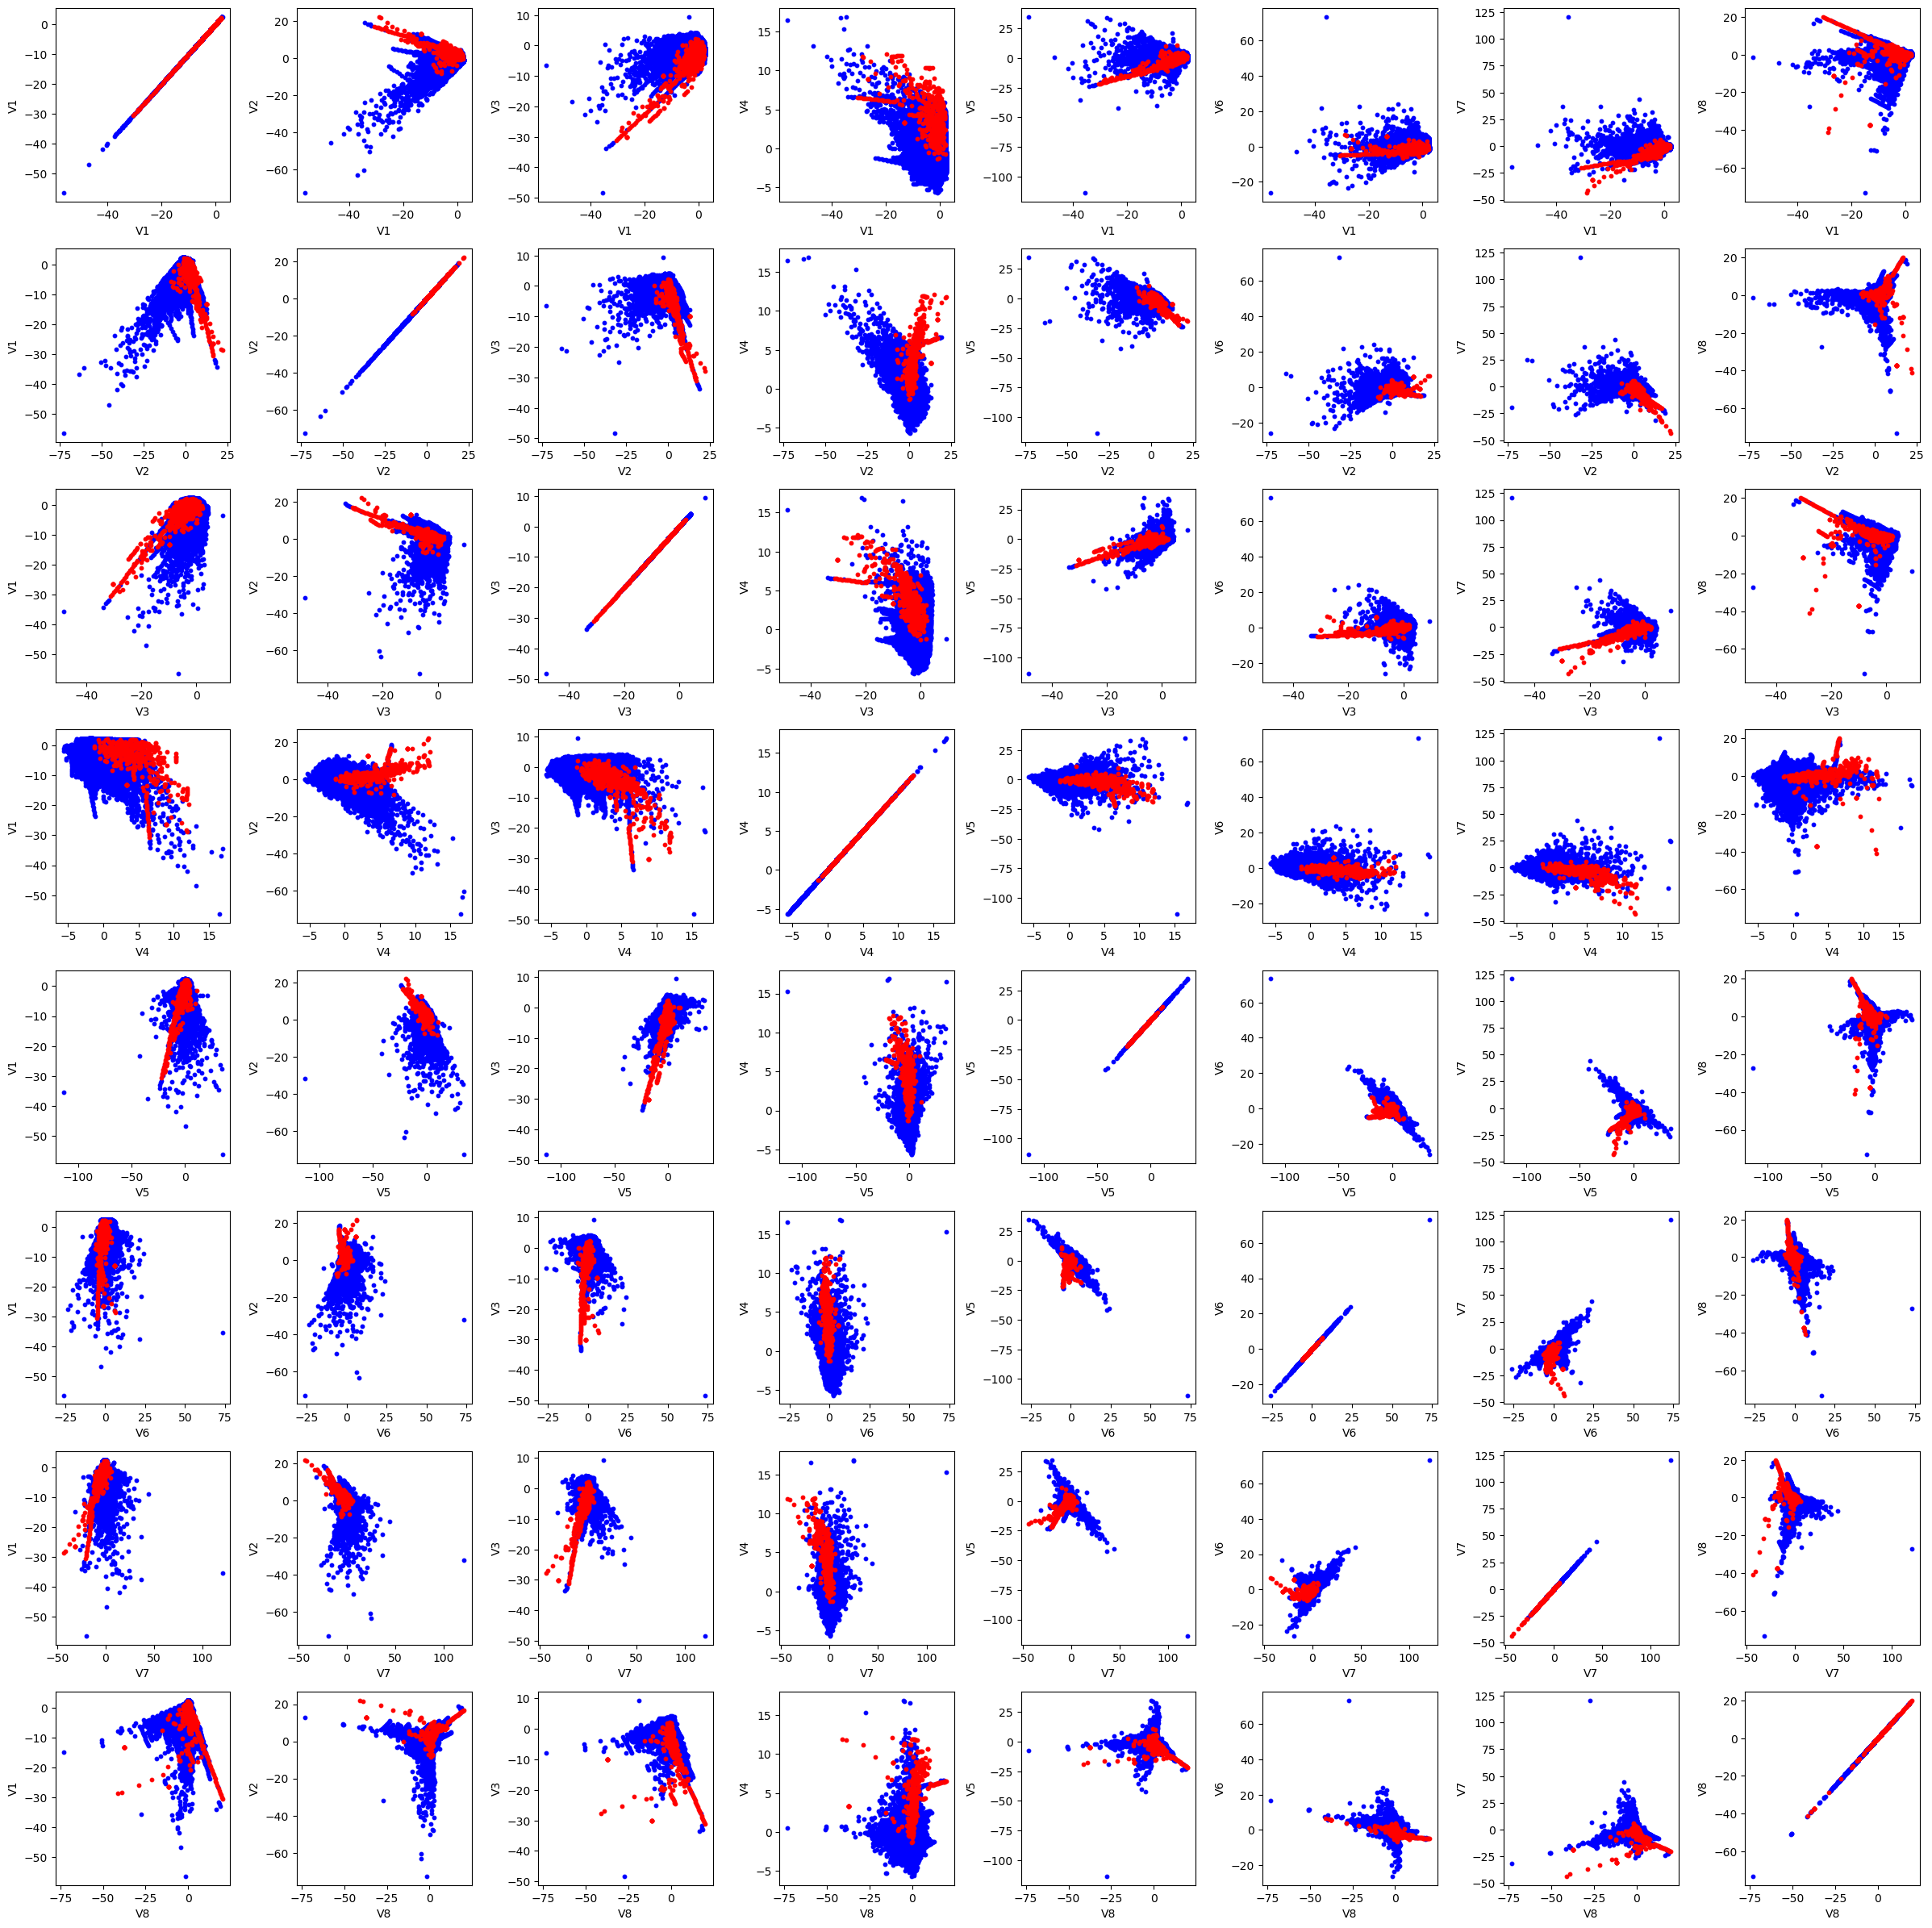

In [3]:
# Plot fraud vs. not fraud for all pairs of the first n_comp components
n_comps = 8

fig, axes = plt.subplots(n_comps, n_comps, figsize=(3*n_comps, 3*n_comps))

# Get all the PCA components
pc_cols = [col for col in creditcard_df if col.startswith('V')]
np_creditcard = creditcard_df[pc_cols].to_numpy()

# Get the fraud output
y_creditcard = creditcard_df['Class']

for i in range(n_comps):
    for j in range(n_comps):
        axes[i, j].scatter(np_creditcard[y_creditcard==0, i], np_creditcard[y_creditcard==0, j], c='blue', label='No fraud', s=10)
        axes[i, j].scatter(np_creditcard[y_creditcard==1, i], np_creditcard[y_creditcard==1, j], c='red', label='Fraud', s=10)
        axes[i, j].set_xlabel(pc_cols[i])
        axes[i, j].set_ylabel(pc_cols[j])
        

plt.tight_layout()
plt.show()

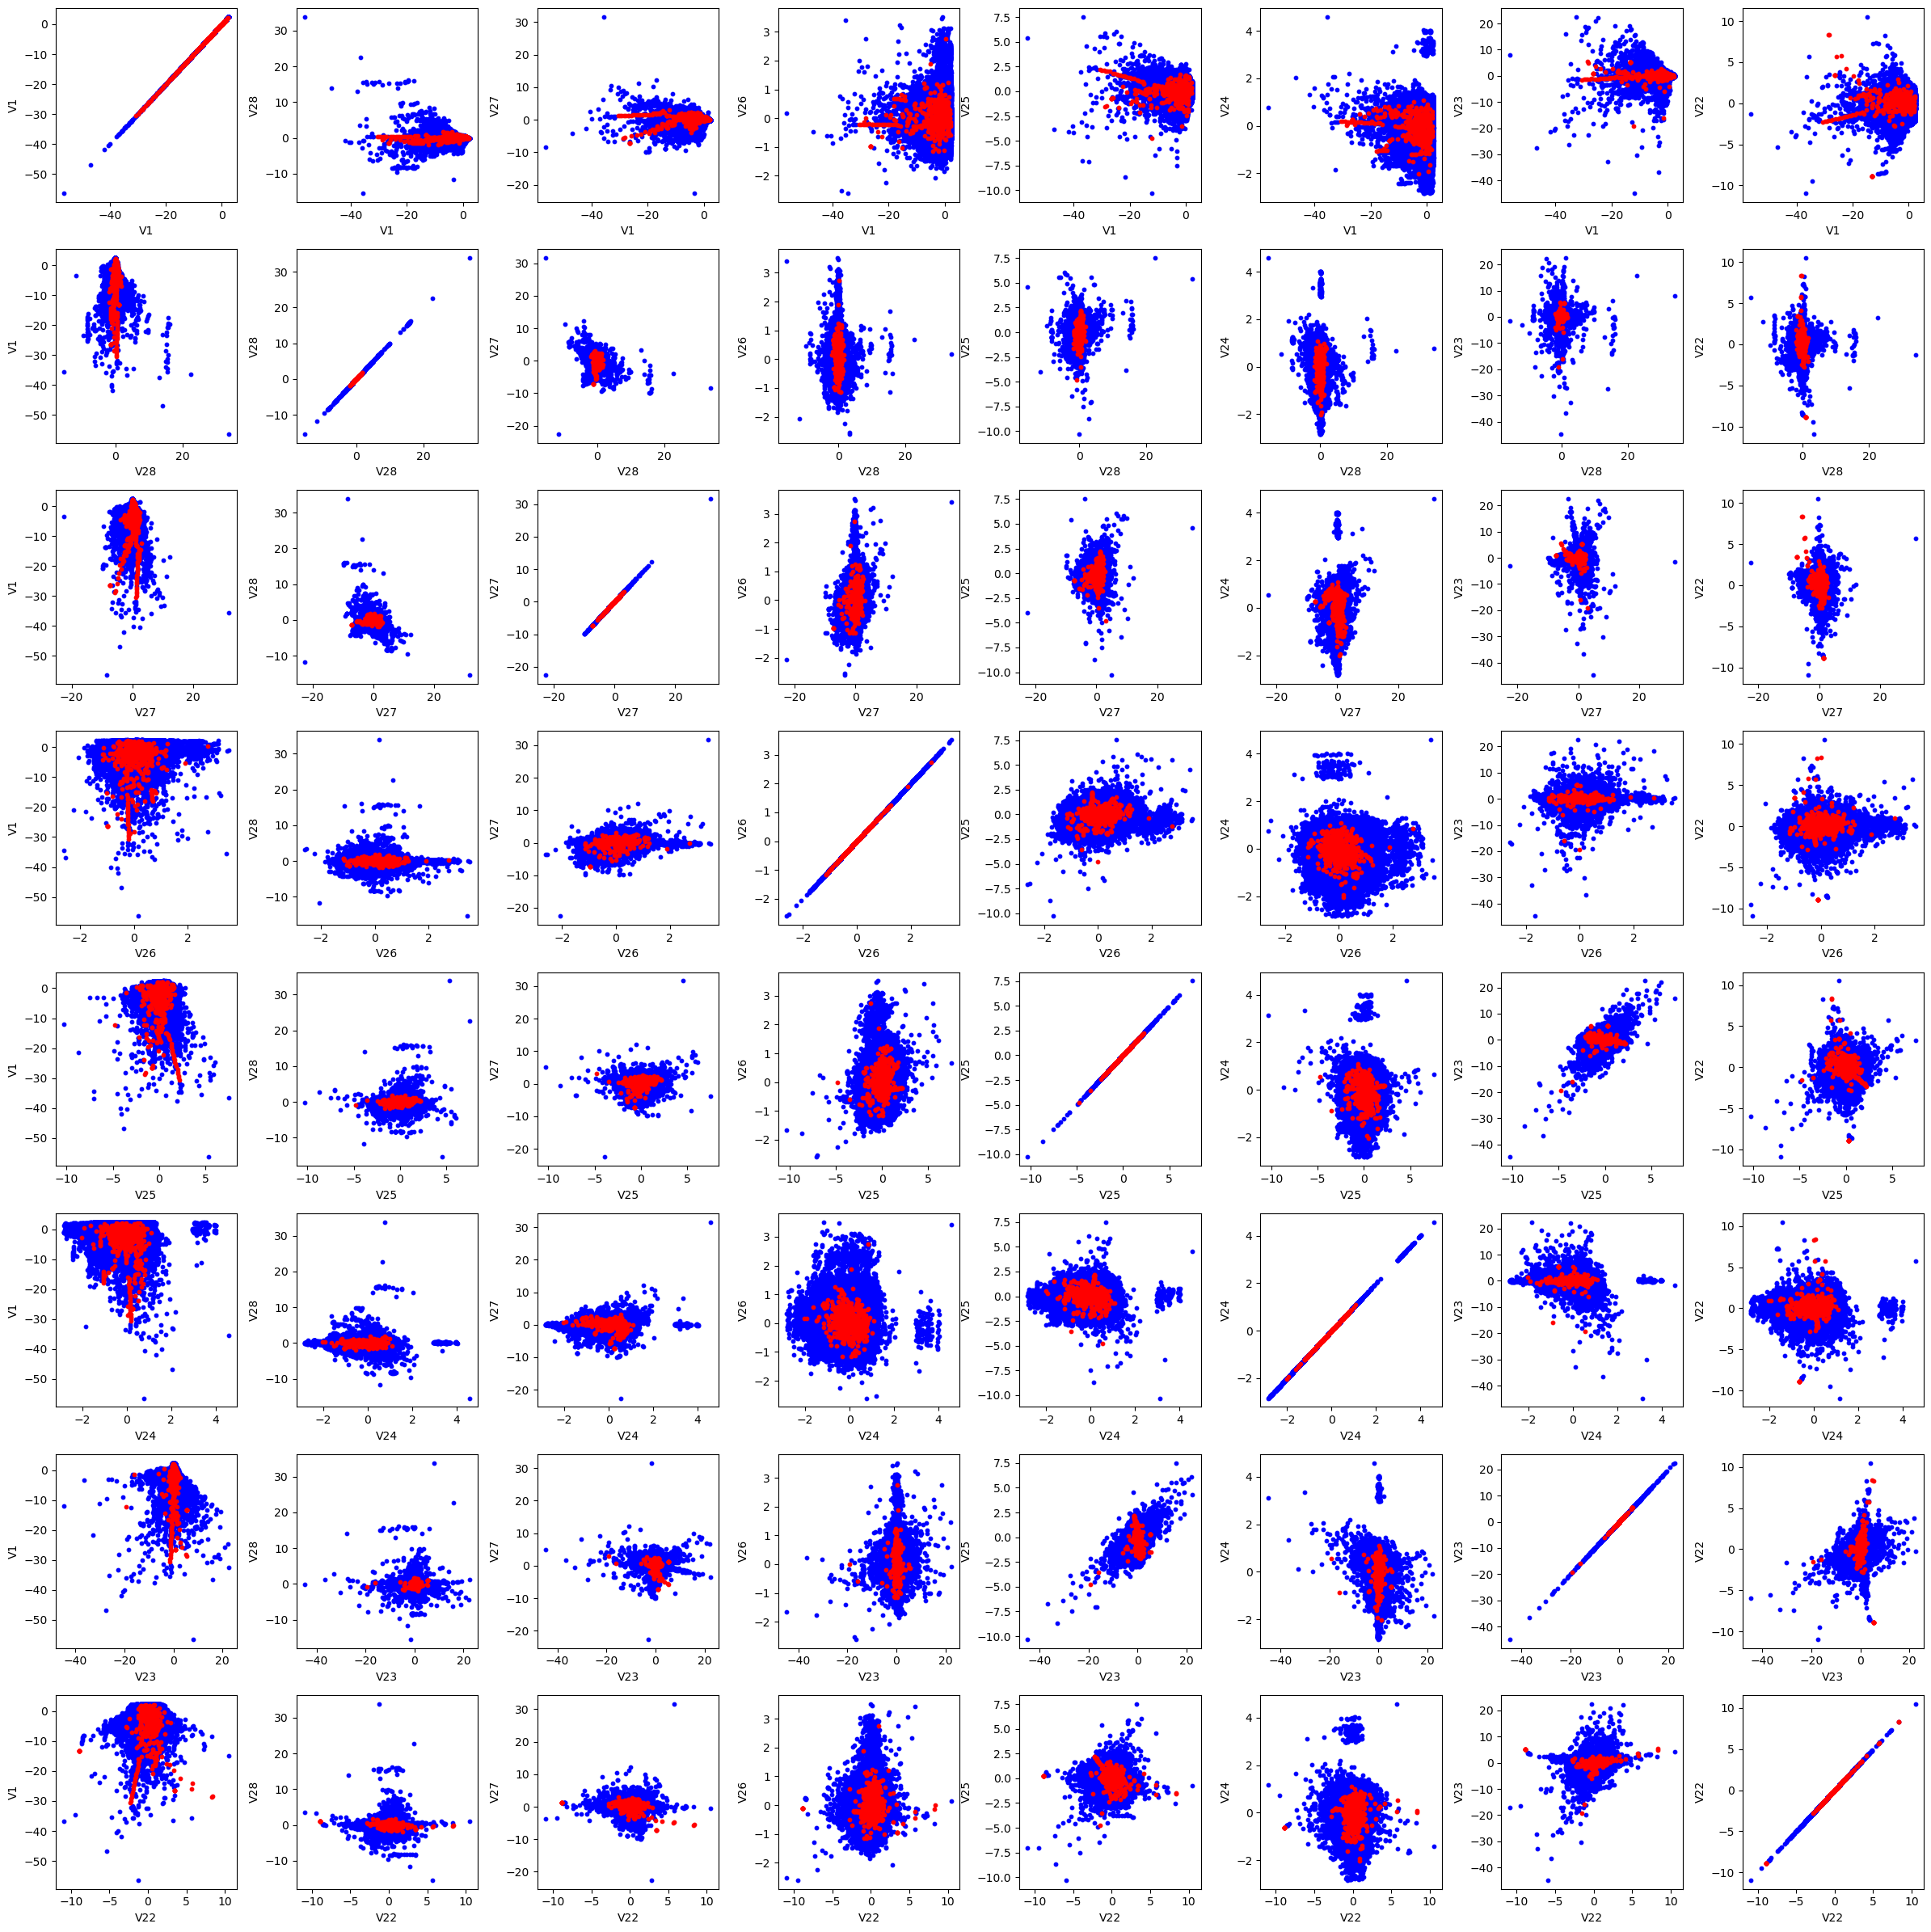

In [4]:
# Plot fraud vs. not fraud for all pairs of the last n_comp components
fig, axes = plt.subplots(n_comps, n_comps, figsize=(3*n_comps, 3*n_comps))

for i in range(n_comps):
    for j in range(n_comps):
        axes[i, j].scatter(np_creditcard[y_creditcard==0, -i], np_creditcard[y_creditcard==0, -j], c='blue', label='No fraud', s=10)
        axes[i, j].scatter(np_creditcard[y_creditcard==1, -i], np_creditcard[y_creditcard==1, -j], c='red', label='Fraud', s=10)
        axes[i, j].set_xlabel(pc_cols[-i])
        axes[i, j].set_ylabel(pc_cols[-j])
        

plt.tight_layout()
plt.show()

Things look more promising in the outlier department for the first 8 principal components, e.g. V3 vs. V8.

Doing Trimap on this doesn't make much sense, because local structure has probably already been obscured by the initial application of PCA.

## Synthetic Financial Datasets for Fraud Detection

Data link: https://www.kaggle.com/datasets/ealaxi/paysim1/data

Synthetic dataset for mobile money transactions.

In [6]:
# Import data
synfindat_df = pd.read_csv("../data/syn_fin_dat.csv")

# Note from Kaggle:
# Transactions which are detected as fraud are cancelled,
# so for fraud detection these columns (oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest ) must not be used
synfindat_X = synfindat_df.drop(columns = ['oldbalanceOrg',
                                 'newbalanceOrig',
                                 'oldbalanceDest',
                                 'newbalanceDest',
                                 'isFraud',
                                 'isFlaggedFraud'
                                 ])
synfindat_y = synfindat_df['isFraud']


In [7]:
synfindat_X.head

<bound method NDFrame.head of          step      type      amount     nameOrig     nameDest
0           1   PAYMENT     9839.64  C1231006815  M1979787155
1           1   PAYMENT     1864.28  C1666544295  M2044282225
2           1  TRANSFER      181.00  C1305486145   C553264065
3           1  CASH_OUT      181.00   C840083671    C38997010
4           1   PAYMENT    11668.14  C2048537720  M1230701703
...       ...       ...         ...          ...          ...
6362615   743  CASH_OUT   339682.13   C786484425   C776919290
6362616   743  TRANSFER  6311409.28  C1529008245  C1881841831
6362617   743  CASH_OUT  6311409.28  C1162922333  C1365125890
6362618   743  TRANSFER   850002.52  C1685995037  C2080388513
6362619   743  CASH_OUT   850002.52  C1280323807   C873221189

[6362620 rows x 5 columns]>

This doesn't feel like enough variables and I really do not want to one-hot encode the name columns.

## Vehicle Insurance Claim Fraud Detection

Data link: https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection/data

Really unclear where this data comes from, but it is apparently a dataset of vehicle insurance fraud with vehicle attributes, models, accident details, and policy details.

In [8]:
# Import data
fraud_oracle = pd.read_csv('../data/fraud_oracle.csv')

fraud_oracle_y = fraud_oracle['FraudFound_P']

### EDA & Data cleaning

Do some cursory EDA and data cleaning (this notebook is helpful: https://www.kaggle.com/code/idolourie/car-insurance-eda)

In [9]:
#Investigate the 0 in DayOfWeekClaimed and MonthClaimed
print('DayOfWeekClaimed has ', len(fraud_oracle.loc[(fraud_oracle['DayOfWeekClaimed']=='0')]), ' row(s) with a 0')
print('MonthClaimed has ',len(fraud_oracle.loc[(fraud_oracle['MonthClaimed']=='0')]),' row(s) with a 0\n') 


# Idendtify which row effected
print('Row ', fraud_oracle.loc[(fraud_oracle['DayOfWeekClaimed']=='0')].index[0], ' has 0 value in DayOfWeekClaimed')
print('Row ', fraud_oracle.loc[(fraud_oracle['MonthClaimed']=='0')].index[0], ' has 0 value in MonthClaimed')

# Both are zero in the same row (row 1516)
# Drop this row
fraud_oracle_y = fraud_oracle_y.loc[fraud_oracle['DayOfWeekClaimed'] != '0']
fraud_oracle = fraud_oracle.loc[fraud_oracle['DayOfWeekClaimed'] != '0']

DayOfWeekClaimed has  1  row(s) with a 0
MonthClaimed has  1  row(s) with a 0

Row  1516  has 0 value in DayOfWeekClaimed
Row  1516  has 0 value in MonthClaimed


In [10]:
# There are 319 records where the age is 0. out of them 30 records are frauds, I will replace the 0 with the AgeOfPolicyHolder
print('There are ', len(fraud_oracle[fraud_oracle['Age']==0]), 'records where the age is 0')

# For all this rows policy holder age  is between 16 and 17 years old.
print('For all these rows policy holder age is: ', fraud_oracle.loc[(fraud_oracle['Age']==0),'AgeOfPolicyHolder'].unique())

# Replace these 0 values with 16 or 17 at random
random_ages = np.random.choice([16, 17], size = len(fraud_oracle[fraud_oracle['Age']==0]))
fraud_oracle.loc[fraud_oracle['Age'] == 0, 'Age'] = random_ages
print('Now there are ', len(fraud_oracle[fraud_oracle['Age']==0]), 'records where the age is 0')

There are  319 records where the age is 0
For all these rows policy holder age is:  ['16 to 17']
Now there are  0 records where the age is 0


In [11]:
# Policy type is just a concatenation of VehicleCategory and BasePolicy, so we will drop that column
fraud_oracle = fraud_oracle.drop(columns = 'PolicyType')

In [12]:
fraud_oracle_X = fraud_oracle.drop(columns = ['FraudFound_P'])

num_feats = fraud_oracle_X.select_dtypes(include='number').columns.tolist()

thresh = 10 # lowered threshold compared to notebook to make proposed_credit_limit continuous

cont_feats = [feat for feat in num_feats if fraud_oracle_X[feat].nunique() >= thresh]
disc_feats = [feat for feat in num_feats if fraud_oracle_X[feat].nunique() < thresh]

cat_feats = fraud_oracle_X.select_dtypes(exclude='number').columns.tolist()
cat_bool_feats = [feat for feat in cat_feats if fraud_oracle_X[feat].nunique() == 2]

print(f'Features: {fraud_oracle_X.shape[1]}\n\n\
Continuous: {len(cont_feats)}\n\
{cont_feats}\n\n\
Discrete or Binned: {len(disc_feats)}\n\
{disc_feats}\n\n\
Categorical: {len(cat_feats)}\n\
{cat_feats}\n\
Categorical Boolean: {len(cat_bool_feats)}\n\
{cat_bool_feats}')

Features: 31

Continuous: 3
['Age', 'PolicyNumber', 'RepNumber']

Discrete or Binned: 5
['WeekOfMonth', 'WeekOfMonthClaimed', 'Deductible', 'DriverRating', 'Year']

Categorical: 23
['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']
Categorical Boolean: 6
['AccidentArea', 'Sex', 'Fault', 'PoliceReportFiled', 'WitnessPresent', 'AgentType']


In [13]:
# Take all variables with only 2 levels to boolean 0/1
# Do the variables that aren't explicitly boolean in nature
fraud_oracle_X['isUrban'] = np.where(fraud_oracle_X['AccidentArea'] == 'Urban', 1, 0)
fraud_oracle_X['isMale'] = np.where(fraud_oracle_X['Sex'] == 'Male', 1, 0)
fraud_oracle_X['isPolicyHolderFault'] = np.where(fraud_oracle_X['Fault'] == 'Policy Holder', 1, 0)
fraud_oracle_X['isExternalAgent'] = np.where(fraud_oracle_X['AgentType'] == 'External', 1, 0)

fraud_oracle_X = fraud_oracle_X.drop(columns=['AccidentArea',
                                              'Sex',
                                              'Fault',
                                              'AgentType'])

# Do the Yes / No variables
fraud_oracle_X['PoliceReportFiled'] = np.where(fraud_oracle_X['PoliceReportFiled'] == 'Yes', 1, 0)
fraud_oracle_X['WitnessPresent'] = np.where(fraud_oracle_X['WitnessPresent'] == 'Yes', 1, 0)


In [14]:
# Now these are the numeric variables:
num_feats_new = fraud_oracle_X.select_dtypes(include='number').columns.tolist()
num_feats_new

['WeekOfMonth',
 'WeekOfMonthClaimed',
 'Age',
 'PolicyNumber',
 'RepNumber',
 'Deductible',
 'DriverRating',
 'PoliceReportFiled',
 'WitnessPresent',
 'Year',
 'isUrban',
 'isMale',
 'isPolicyHolderFault',
 'isExternalAgent']

### PCA

Try a PCA on the numeric variables (yeah there are some binned ones in there, but hopefully we will see outliers).

[0.13863534 0.09218626]


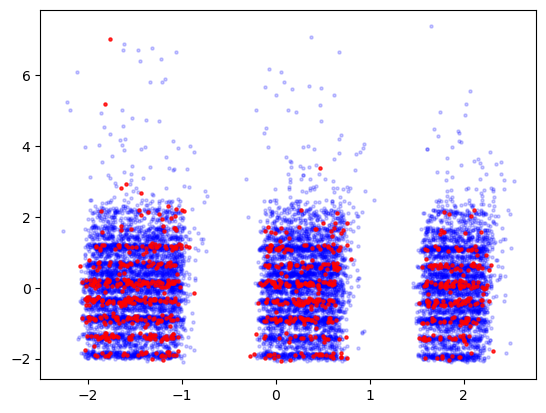

In [18]:
fraud_oracle_X_num = fraud_oracle_X[num_feats_new]
scaler = StandardScaler()
fraud_oracle_X_num = scaler.fit_transform(fraud_oracle_X_num)
pca = PCA()
pca.fit(fraud_oracle_X_num)
# Explained variance from first two PCs
print(pca.explained_variance_ratio_[0:2])

# Plot first two components
fraud_oracle_X_pca = pca.transform(fraud_oracle_X_num)
plt.scatter(fraud_oracle_X_pca[fraud_oracle_y == False, 0],
            fraud_oracle_X_pca[fraud_oracle_y == False, 1],
            c = "blue",
            s = 5,
            alpha = 0.2)
plt.scatter(fraud_oracle_X_pca[fraud_oracle_y == True, 0],
            fraud_oracle_X_pca[fraud_oracle_y == True, 1],
            c = "red",
            s = 5,
            alpha = 0.8)

Yeah that's tragic